In [29]:
%config InlineBackend.figure_formats = ['retina']
%matplotlib inline
import pandas as pd
import uproot
import awkward
import matplotlib.pyplot as plt
import numpy as np
import math
import numba
from matplotlib.colors import LogNorm
import uproot_methods

from utils import set_plotting_style, numba_histogram, numba_histogram2d, make_profile

In [30]:
set_plotting_style()

In [31]:
%%time
tdata = uproot.open("/hadoop/cms/store/user/namin/ProjectMetis/ScoutingCaloMuon_Run2018C-v1_RAW_v3/output_1.root")["Events"]
tmc = uproot.open("/hadoop/cms/store/user/namin/DisplacedMuons/babies/baby_HToZZTo2Mu2X_ctau50mm_skim2mu.root")["Events"]
cache = uproot.ArrayCache("4GB")
readkw = dict(cache=cache,entrystop=10000000)

CPU times: user 153 ms, sys: 16 ms, total: 169 ms
Wall time: 346 ms


In [32]:
tmc.keys()

[b'run',
 b'luminosityBlock',
 b'event',
 b'MET_pt',
 b'MET_phi',
 b'rho',
 b'LeadingPair_mass',
 b'LeadingPair_sameVtx',
 b'LeadingPair_isOS',
 b'DV_x',
 b'DV_y',
 b'DV_z',
 b'DV_xError',
 b'DV_yError',
 b'DV_zError',
 b'DV_tracksSize',
 b'DV_chi2',
 b'DV_ndof',
 b'DV_isValidVtx',
 b'Jet_pt',
 b'Jet_eta',
 b'Jet_phi',
 b'Jet_m',
 b'Jet_jetArea',
 b'Jet_maxEInEmTowers',
 b'Jet_maxEInHadTowers',
 b'Jet_hadEnergyInHB',
 b'Jet_hadEnergyInHE',
 b'Jet_hadEnergyInHF',
 b'Jet_emEnergyInEB',
 b'Jet_emEnergyInEE',
 b'Jet_emEnergyInHF',
 b'Jet_towersArea',
 b'Jet_mvaDiscriminator',
 b'Jet_btagDiscriminator',
 b'PV_x',
 b'PV_y',
 b'PV_z',
 b'PV_zError',
 b'PV_xError',
 b'PV_yError',
 b'PV_tracksSize',
 b'PV_chi2',
 b'PV_ndof',
 b'PV_isValidVtx',
 b'PVM_x',
 b'PVM_y',
 b'PVM_z',
 b'PVM_zError',
 b'PVM_xError',
 b'PVM_yError',
 b'PVM_tracksSize',
 b'PVM_chi2',
 b'PVM_ndof',
 b'PVM_isValidVtx',
 b'Muon_pt',
 b'Muon_eta',
 b'Muon_phi',
 b'Muon_m',
 b'Muon_ecalIso',
 b'Muon_hcalIso',
 b'Muon_trackIso'

In [33]:
# skim requires >=1 DV and >=2 muons in each event. This is a jagged array of muon dxy
tdata.array("Muon_dxy",**readkw)

<JaggedArray [[0.089347824 0.09373529] [-0.051917695 -0.052934606] [-0.06347708 -0.12631223] ... [0.065046206 0.09226747] [0.0020976623 0.060521908] [-0.10835093 -0.09992092]] at 0x7f7e29585d30>

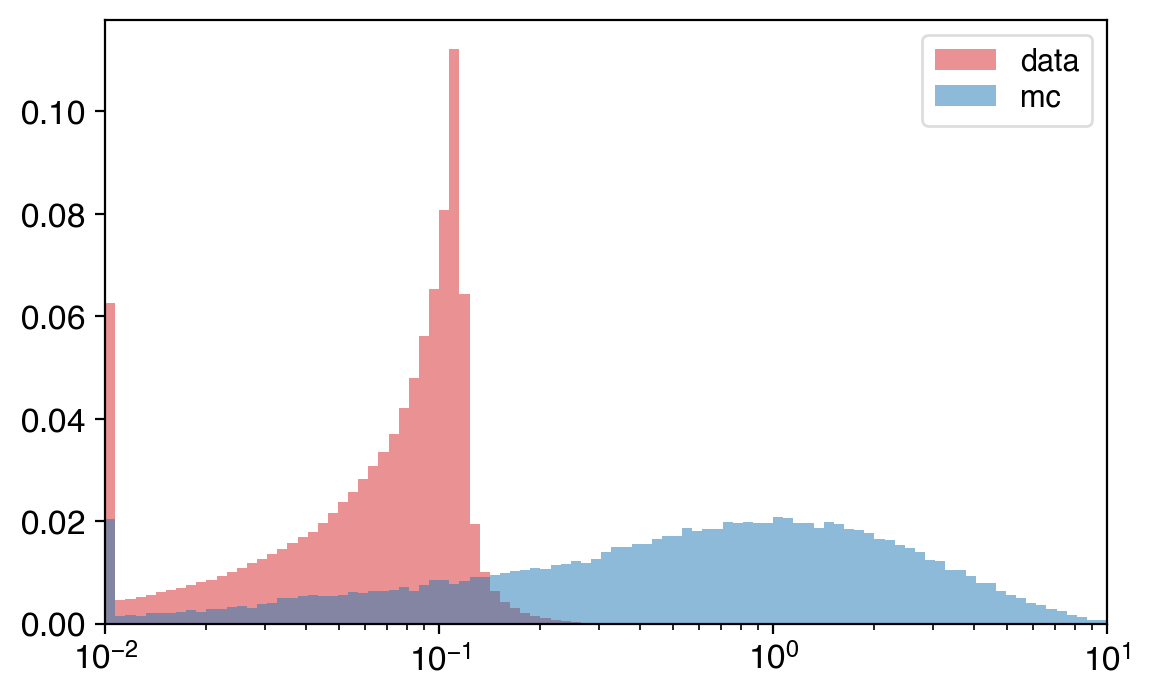

In [34]:
# dvar = {}
fig,ax = plt.subplots()

bins = np.logspace(-2,1.0,100)
def plot(var,label):
    counts,edges = numba_histogram(var,bins=bins,overflow=True)
    ax.bar(edges[:-1],counts/counts.sum(),align="edge",width=edges[1:]-edges[:-1],alpha=0.5,color="C3" if label=="data" else "C0",label=label)
    
plot(np.abs(tdata.array("Muon_dxy",**readkw)[:,:2].flatten()),"data")
plot(np.abs(tmc.array("Muon_dxy",**readkw)[:,:2].flatten()),"mc")


ax.set_xscale("log")
# ax.set_yscale("log")
ax.legend()